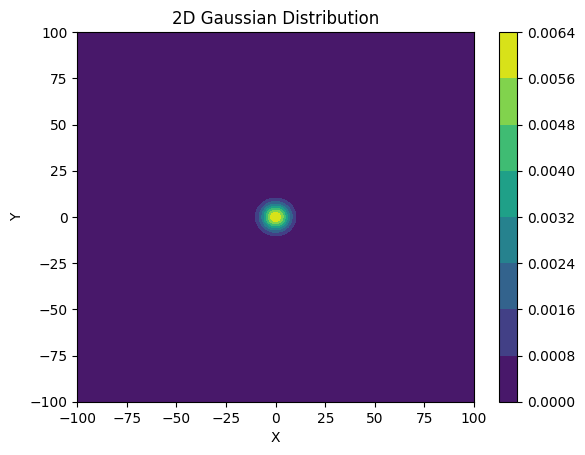

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
mean = [0, 0]
std = 5

# Create a grid of x and y values
x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y)

# Calculate the values of the Gaussian distribution
Z = (1 / (2 * np.pi * std**2)) * np.exp(-(X**2 + Y**2) / (2 * std**2))

# Plot the Gaussian distribution
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution')
plt.show()


In [39]:
import numpy as np
import os

In [40]:
valid_name = os.listdir('datasets/FSC/gt_density_map_adaptive_384_VarV2/')
valid_name = [i.replace('.npy','') for i in valid_name]

In [41]:
valid_name[:10]

['3806',
 '2791',
 '3568',
 '7224',
 '6488',
 '2906',
 '2689',
 '5194',
 '7681',
 '1458']

In [42]:
# read npy datasets/FSC/gt_density_map_adaptive_384_VarV2/2.npy
# image datasets/FSC/images_384_VarV2/2.jpg
i = 6
data = np.load(f'datasets/FSC/gt_density_map_adaptive_384_VarV2/{valid_name[i]}.npy')
image = plt.imread(f'datasets/FSC/images_384_VarV2/{valid_name[i]}.jpg')
print(data.shape)

(384, 580)


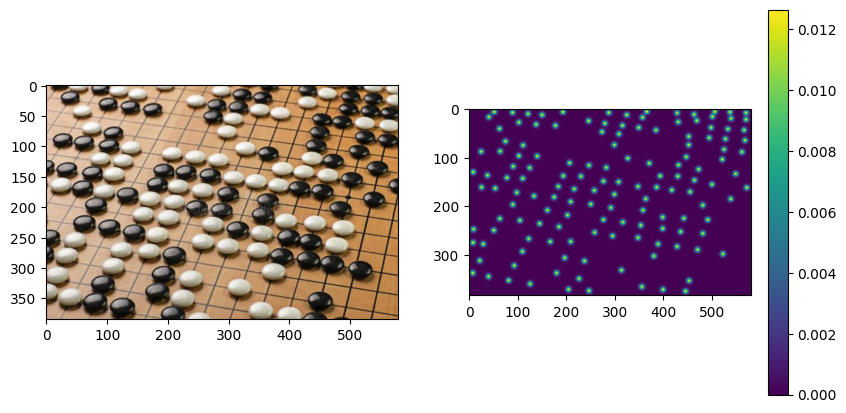

In [43]:
# show image and data side by side
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(data)
plt.colorbar()

In [44]:
import re

def extract_values_from_log(log_file):
    pattern = r'pred_cnt: ([\d\.]+),  gt_cnt: (\d+),  error: ([\d\.]+),  AE: ([\d\.]+),  SE: ([\d\.]+), id: (\w+\.jpg), s_cnt: (\w+)'
    values = []
    with open(log_file, 'r') as f:
        for line in f:
            match = re.search(pattern, line)
            if match:
                pred_cnt = float(match.group(1))
                gt_cnt = int(match.group(2))
                error = float(match.group(3))
                AE = float(match.group(4))
                SE = float(match.group(5))
                id = match.group(6)
                s_cnt = True if match.group(7) == 'True' else False
                values.append({
                    'pred_cnt': pred_cnt,
                    'gt_cnt': gt_cnt,
                    'error': error,
                    'AE': AE,
                    'SE': SE,
                    'id': id,
                    's_cnt': s_cnt
                })
    return values

In [45]:
logfile = "/workspace/DIP/repo/CounTR/logs/test.log"
# logfile = "/workspace/DIP/repo/CounTR/logs/test_2.log"
vals = extract_values_from_log(logfile)

In [46]:
import pandas as pd
df = pd.DataFrame(vals)

In [47]:
df.describe()

,pred_cnt,gt_cnt,error,AE,SE
count,1187.000000,1187.000000,1187.000000,1187.000000,1.187000e+03
mean,54.652279,66.360573,24.214218,24.214218,1.141254e+04
std,99.394205,147.001221,104.092960,104.092960,3.331415e+05
min,2.873760,8.000000,0.035854,0.035854,1.285534e-03
25%,20.983843,19.000000,4.181949,4.181949,1.748907e+01
50%,34.332600,37.000000,9.502606,9.502606,9.029953e+01
75%,61.960499,76.000000,21.452066,21.452066,4.601921e+02
max,2749.340424,3701.000000,3387.564466,3387.564466,1.147559e+07


<Axes: >

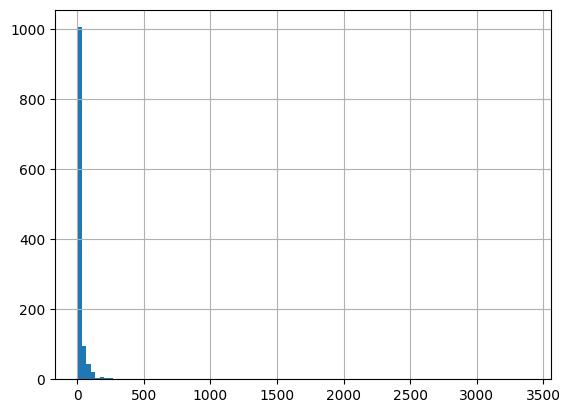

In [48]:
df.AE.hist(bins=100)

In [49]:
df = df[df.gt_cnt < 1000]

In [50]:
df.corr(numeric_only=True)

,pred_cnt,gt_cnt,error,AE,SE,s_cnt
pred_cnt,1.000000,0.828200,0.602390,0.602390,0.529174,0.551110
gt_cnt,0.828200,1.000000,0.733068,0.733068,0.519465,0.261203
error,0.602390,0.733068,1.000000,1.000000,0.853470,0.362570
AE,0.602390,0.733068,1.000000,1.000000,0.853470,0.362570
SE,0.529174,0.519465,0.853470,0.853470,1.000000,0.521493
s_cnt,0.551110,0.261203,0.362570,0.362570,0.521493,1.000000


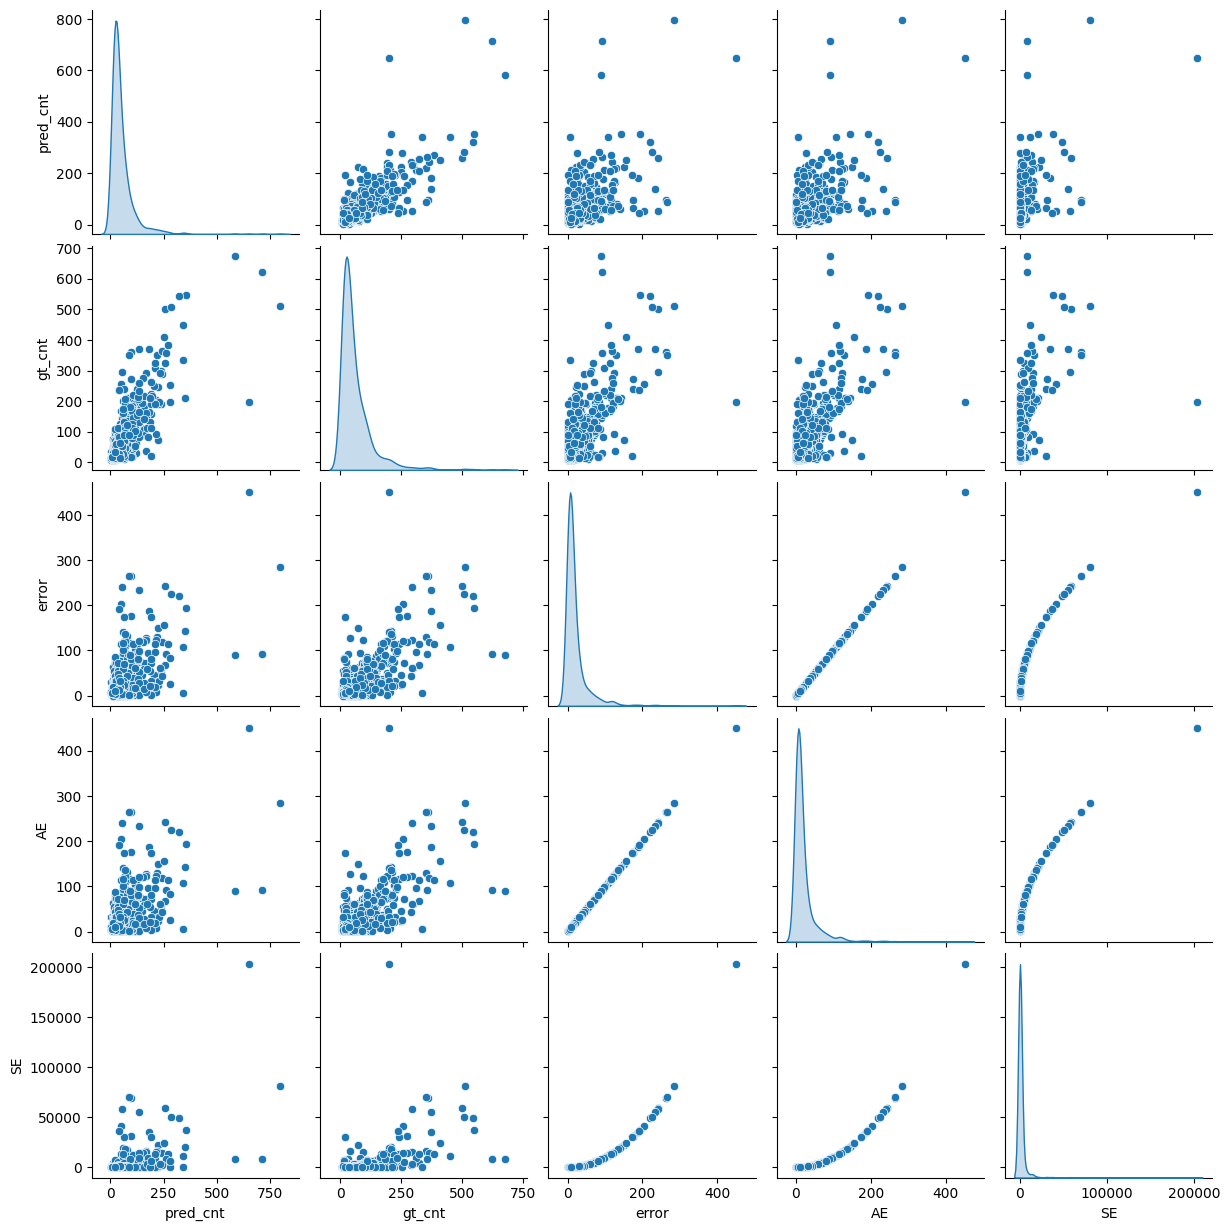

In [51]:
import seaborn as sns
sns.pairplot(df[["pred_cnt", "gt_cnt", "error", "AE", "SE"]], diag_kind="kde")


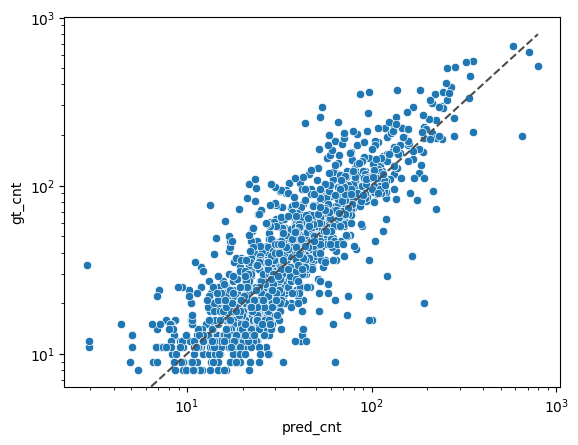

In [52]:
sns.scatterplot(data=df, x='pred_cnt', y='gt_cnt')
plt.plot([0, df['pred_cnt'].max()], [0, df['pred_cnt'].max()], ls='--', c='.3')
# set log scale
plt.xscale('log')
plt.yscale('log')

In [53]:
print((df.pred_cnt>=df.gt_cnt).mean())

0.4320675105485232


In [54]:
df.describe()

,pred_cnt,gt_cnt,error,AE,SE
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000
mean,52.159898,61.189030,21.236600,21.236600,1717.508227
std,60.829475,72.177554,35.603156,35.603156,8560.022890
min,2.873760,8.000000,0.035854,0.035854,0.001286
25%,20.945953,19.000000,4.162670,4.162670,17.327823
50%,34.306938,37.000000,9.495831,9.495831,90.170798
75%,61.905842,75.000000,21.411897,21.411897,458.469314
max,796.401588,675.000000,451.045349,451.045349,203441.906964


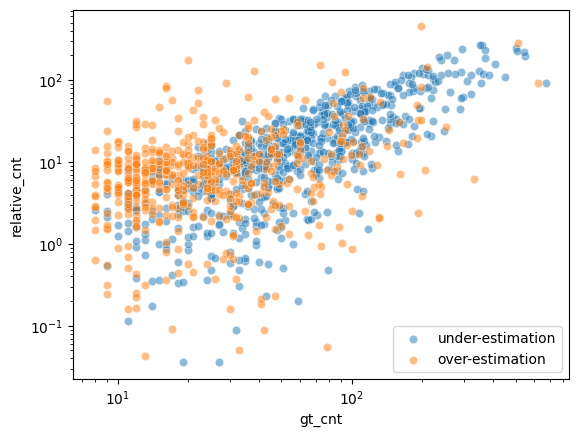

In [55]:
df["r_error"] = df.error / df.gt_cnt
df["relative_cnt"] = df.gt_cnt-df.pred_cnt
df["-relative_cnt"] = -df.relative_cnt
sns.scatterplot(data=df[df["relative_cnt"]>0], x='gt_cnt', y='relative_cnt', label="under-estimation",alpha=0.5)
sns.scatterplot(data=df[df["relative_cnt"]<0], x='gt_cnt', y='-relative_cnt', label="over-estimation",alpha=0.5)
plt.xscale('log')
plt.yscale('log')

## 解析 pixel-based segmentation

以下结论：

- 这种策略下，框大小和 AE 降低不必然相关（即便框很小，seg 反而可能导致过分高估，而且一部分case的 gt 聚集效应很明显, seg 没有什么好处）

- 

In [3]:
import re
import pandas as pd

def parse_file(file_path):
    pattern = r'\[.*\]\s\d+/\d+:\s(?:pred_cnt: (?P<pred_cnt>[0-9.]+),\s+)?(?:gt_cnt: (?P<gt_cnt>[0-9.]+),\s+)?(?:error: (?P<error>[0-9.-]+),\s+)?(?:AE: (?P<AE>[0-9.-]+),\s+)?(?:SE: (?P<SE>[0-9.-]+),\s+)?(?:RCE: (?P<RCE>[0-9.-]+),\s+)?(?:RSCE: (?P<RSCE>[0-9.-]+),\s+)?(?:id: \d+.jpg, rect_gap: (tensor\(\[)?(?P<rect_gap>\d+)(\]\))?\s+)?(?:s_cnt: (?P<s_cnt>[0-9.]+))'    
    
    data = {
        'pred_cnt': [],
        'gt_cnt': [],
        'error': [],
        'AE': [],
        'SE': [],
        's_cnt': [],
        'rect_gap': []
    }

    with open(file_path, 'r') as file:
        for line in file.readlines():
            match = re.match(pattern, line)
            if match:
                for key in data.keys():
                    data[key].append(float(match.group(key)))
    
    dataframe = pd.DataFrame(data)
    return dataframe

In [4]:
file1 = '/workspace/DIP/repo/CounTR/logs/test-n1-16-10.log'
file2 = '/workspace/DIP/repo/CounTR/logs/test-n2-9-15-16-10.log'

df_1 = parse_file(file1)
df_2 = parse_file(file2)

df_1e = df_1[df_2['s_cnt']==9.0]
df_2e = df_2[df_2['s_cnt']==9.0]

print(df_1.describe())
print(len(df_2e))
print(df_1e.describe())
df_2e.describe()


          pred_cnt       gt_cnt        error           AE            SE   
count  1187.000000  1187.000000  1187.000000  1187.000000  1.187000e+03  \
mean     54.932927    66.360573    24.386974    24.386974  1.072110e+04   
std      95.796243   147.001221   100.672299   100.672299  2.987365e+05   
min       2.873760     8.000000     0.035854     0.035854  1.285534e-03   
25%      20.983843    19.000000     4.181949     4.181949  1.748907e+01   
50%      34.332600    37.000000     9.502606     9.502606  9.029953e+01   
75%      61.960499    76.000000    21.452066    21.452066  4.601921e+02   
max    2442.562225  3701.000000  3206.092788  3206.092788  1.027903e+07   

             s_cnt     rect_gap  
count  1187.000000  1187.000000  
mean      0.080876    60.607414  
std       1.135149    38.139036  
min       0.000000     3.000000  
25%       0.000000    35.000000  
50%       0.000000    55.000000  
75%       0.000000    77.000000  
max      16.000000   344.000000  
33
         pred_c

,pred_cnt,gt_cnt,error,AE,SE,s_cnt,rect_gap
count,33.000000,33.000000,33.000000,33.000000,3.300000e+01,33.0,33.000000
mean,345.760686,163.181818,208.631100,208.631100,1.255177e+05,9.0,11.787879
std,297.929260,146.885469,290.779972,290.779972,3.852168e+05,0.0,1.452532
min,57.415035,11.000000,22.917249,22.917249,5.252003e+02,9.0,10.000000
25%,179.587052,63.000000,74.746088,74.746088,5.586978e+03,9.0,10.000000
50%,248.885338,122.000000,116.240614,116.240614,1.351188e+04,9.0,12.000000
75%,416.359867,191.000000,203.036013,203.036013,4.122362e+04,9.0,13.000000
max,1530.943283,544.000000,1413.943283,1413.943283,1.999236e+06,9.0,14.000000


Total compare true 6 / 33
Error compare true 23 / 33


<Axes: xlabel='gt', ylabel='AE'>

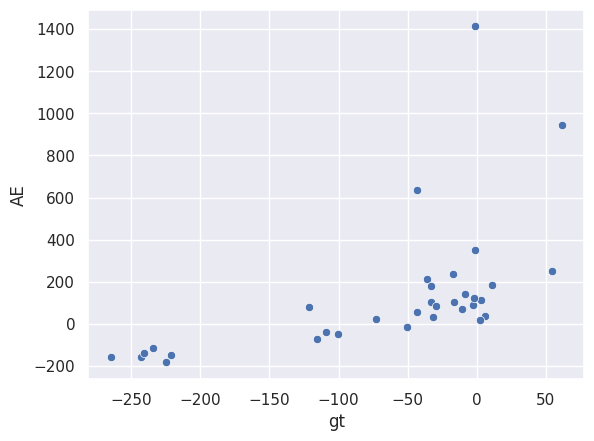

In [27]:
import seaborn as sns
sns.set_theme()
# 了解偏序关系与 error 上升的关系

gt_cmp = df_1e['pred_cnt'] >= df_1e['gt_cnt']
error_cmp = df_2e['AE'] >= df_1e['AE']
df = gt_cmp.copy()
df['gt'] = df_1e['pred_cnt'] - df_1e['gt_cnt']
df['AE'] = df_2e['AE'] - df_1e['AE']

print(f'Total compare true {sum(gt_cmp)} / {len(gt_cmp)}')
print(f'Error compare true {sum(error_cmp)} / {len(error_cmp)}')
sns.scatterplot(df, x='gt', y='AE')

Total compare true 28 / 33
Error compare true 23 / 33


<Axes: xlabel='gt', ylabel='AE'>

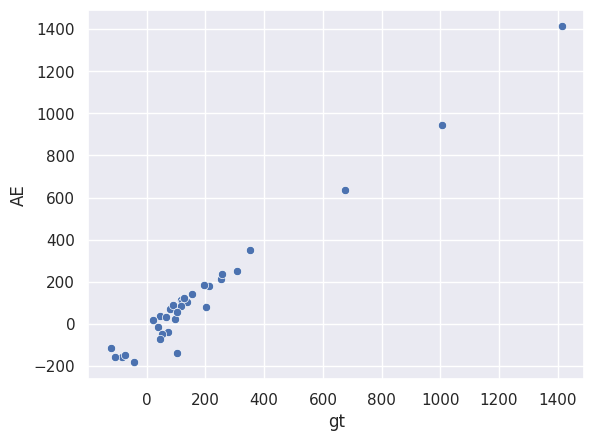

In [35]:
import seaborn as sns
sns.set_theme()
# 了解偏序关系与 error 上升的关系

gt_cmp = df_2e['pred_cnt'] >= df_2e['gt_cnt']
error_cmp = df_2e['AE'] >= df_1e['AE']
df['gt'] = df_2e['pred_cnt'] - df_2e['gt_cnt']
df['AE'] = df_2e['AE'] - df_1e['AE']
df = pd.concat([df['gt'], df['AE']], axis=1)

print(f'Total compare true {sum(gt_cmp)} / {len(gt_cmp)}')
print(f'Error compare true {sum(error_cmp)} / {len(error_cmp)}')
sns.scatterplot(df, x='gt', y='AE')

              gt          AE  rect_gap
8     -83.640133 -159.078526      11.0
50   1005.349422  943.866131      11.0
76    251.521952  215.468836      10.0
141   116.240614  113.496614      14.0
145    72.829844  -36.175070      11.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


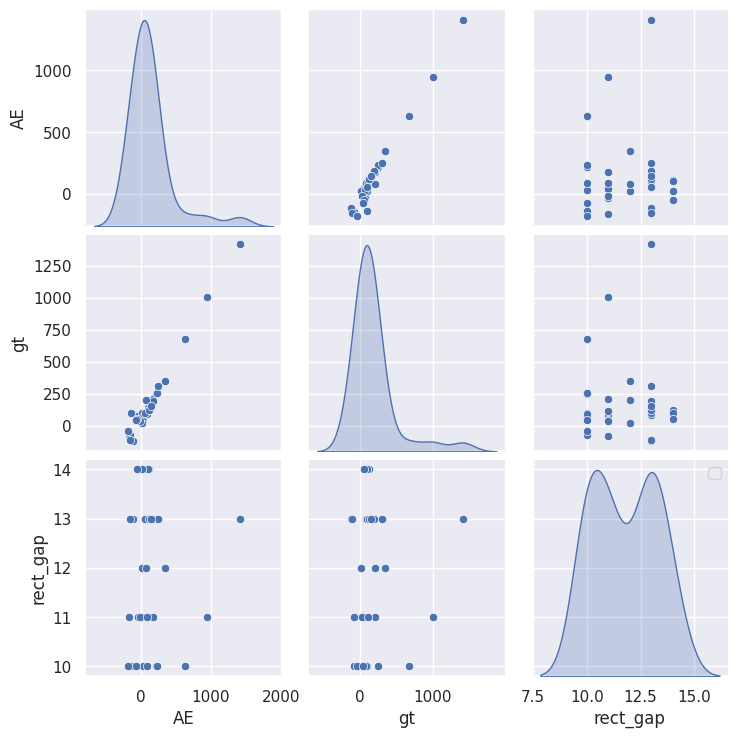

In [37]:
import matplotlib.pyplot as plt

df['rect_gap'] = df_1e['rect_gap']
print(df[:5])
sns.pairplot(df[["AE", "gt", "rect_gap"]], diag_kind="kde")
plt.legend()

<Axes: >

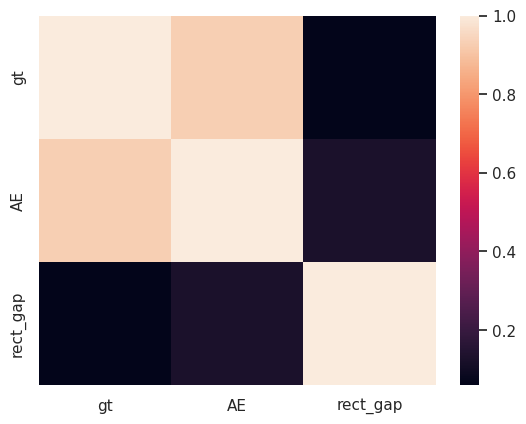

In [41]:
relation = df.corr(method='spearman')
sns.heatmap(relation, fmt=".2g")

In [29]:
over_es = df_1e[df_1e['pred_cnt'] >= df_1e['gt_cnt']]
under_es = df_1e[df_1e['pred_cnt'] < df_1e['gt_cnt']]

print(over_es.describe())
print(under_es.describe())

print(f'Overestimated: {len(over_es)}')
print(over_es)
print(f'Underestimated: {len(under_es)}')
print(under_es[:5])

         pred_cnt      gt_cnt      error         AE           SE  s_cnt   
count    6.000000    6.000000   6.000000   6.000000     6.000000    6.0  \
mean   110.970901   88.000000  22.970901  22.970901  1146.690385    0.0   
std     85.439658   71.604469  27.254976  27.254976  1731.090842    0.0   
min     14.744000   12.000000   2.381638   2.381638     5.672198    0.0   
25%     32.260755   25.000000   3.548788   3.548788    14.536949    0.0   
50%    126.318428   90.000000   8.558358   8.558358    79.980590    0.0   
75%    184.695644  128.750000  43.363213  43.363213  2226.188683    0.0   
max    193.381638  191.000000  61.483292  61.483292  3780.195149    0.0   

        rect_gap  
count   6.000000  
mean   12.333333  
std     1.211060  
min    11.000000  
25%    11.250000  
50%    12.500000  
75%    13.000000  
max    14.000000  
         pred_cnt      gt_cnt       error          AE            SE  s_cnt   
count   27.000000   27.000000   27.000000   27.000000     27.000000   27.0 

## predSplit

In [2]:
import re
import pandas as pd

def parse_file(file_path):
    pattern = r'\[.*\]\s\d+/\d+:\s(?:pred_cnt: (?P<pred_cnt>[0-9.]+),\s+)?(?:gt_cnt: (?P<gt_cnt>[0-9.]+),\s+)?(?:error: (?P<error>[0-9.-]+),\s+)?(?:AE: (?P<AE>[0-9.-]+),\s+)?(?:SE: (?P<SE>[0-9.-]+),\s+)?(?:RCE: (?P<RCE>[0-9.-]+),\s+)?(?:RSCE: (?P<RSCE>[0-9.-]+),\s+)?(?:id: \d+.jpg, rect_gap: (tensor\(\[)?(?P<rect_gap>\d+)(\]\))?\s+)?(?:s_cnt: (?P<s_cnt>[0-9.]+))'    
    
    data = {
        'pred_cnt': [],
        'gt_cnt': [],
        'error': [],
        'AE': [],
        'SE': [],
        'RCE': [],
        'RSCE': [],
        's_cnt': [],
        'rect_gap': [],
    }

    with open(file_path, 'r') as file:
        for line in file.readlines():
            match = re.match(pattern, line)
            if match:
                for key in data.keys():
                    data[key].append(float(match.group(key)))
    
    dataframe = pd.DataFrame(data)
    return dataframe

In [24]:
import math
# file1 = '/workspace/DIP/repo/CounTR/logs/test_noThres.log'
file1 = '/workspace/DIP/repo/CounTR/logs/test_no_seg.log'

df_1 = parse_file(file1)
print(df_1.describe())

          pred_cnt       gt_cnt        error           AE            SE   
count  1169.000000  1169.000000  1169.000000  1169.000000  1.169000e+03  \
mean     51.092370    66.710864    26.326979    26.326979  1.684648e+04   
std      52.971131   148.076232   127.150323   127.150323  4.107511e+05   
min       2.874074     8.000000     0.114373     0.114373  1.308123e-02   
25%      20.792549    19.000000     4.451263     4.451263  1.981375e+01   
50%      34.225548    37.000000     9.646091     9.646091  9.304708e+01   
75%      61.951805    76.000000    21.826534    21.826534  4.763976e+02   
max     584.377808  3701.000000  3656.457230  3656.457230  1.336968e+07   

               RCE         RSCE        s_cnt     rect_gap  
count  1169.000000  1169.000000  1169.000000  1169.000000  
mean      0.389799     0.417988     0.082977    60.638152  
std       0.516016     2.809345     0.826027    38.334370  
min       0.010398     0.000108     0.000000     3.000000  
25%       0.142683     0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


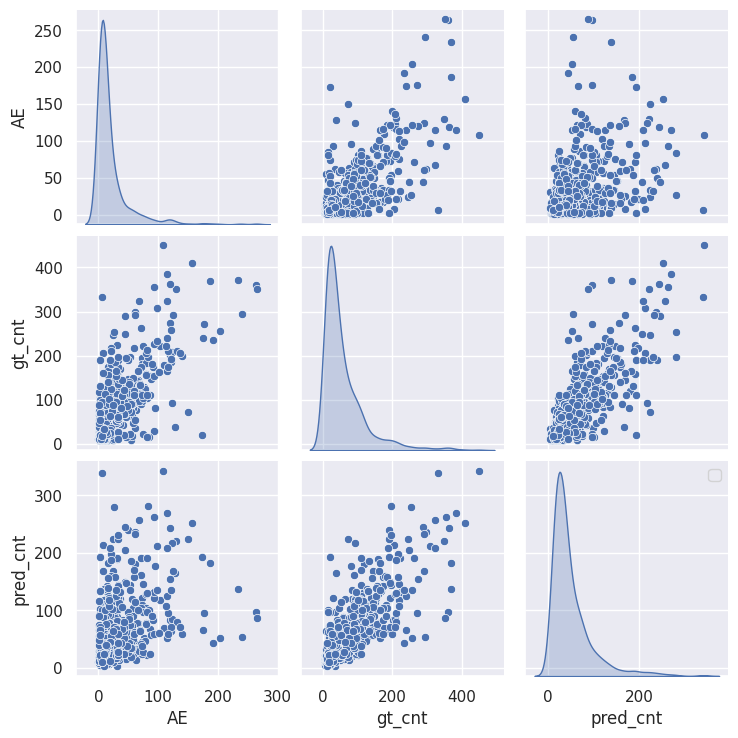

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df_1 = df_1[df_1['gt_cnt'] < 500]


sns.pairplot(df_1[["AE", "gt_cnt", "pred_cnt"]], diag_kind="kde")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


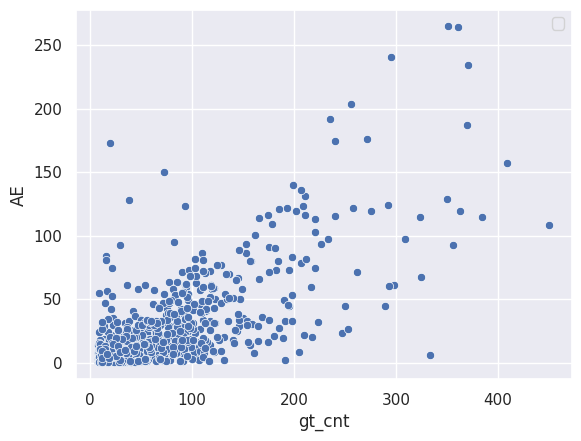

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.scatterplot(df_1, x='gt_cnt', y='AE')

plt.legend()


## Case Match

In [30]:
import math
file1 = '/workspace/DIP/repo/CounTR/logs/test_no_seg.log'

df_1 = parse_file(file1)

In [33]:
df_large = df_1[df_1['gt_cnt'] > 300]
df_large = df_mini[df_mini['pred_cnt'] > df_mini['gt_cnt']]
df_mini = df_1[df_1['gt_cnt'] < 20]
df_mini = df_mini[df_mini['pred_cnt'] > df_mini['gt_cnt']]

print(df_large.describe())
print(df_mini.describe())

         pred_cnt       gt_cnt        error           AE            SE   
count   11.000000    11.000000    11.000000    11.000000  1.100000e+01  \
mean   307.282641  1002.545455   695.262814   695.262814  1.654016e+06   
std    169.590391  1085.008052  1134.763249  1134.763249  4.089838e+06   
min     17.837627   409.000000    90.622192    90.622192  8.212382e+03   
25%    254.736458   504.000000   170.548988   170.548988  2.927576e+04   
50%    323.025116   544.000000   220.974884   220.974884  4.882990e+04   
75%    395.216141   648.000000   368.440516   368.440516  1.515544e+05   
max    584.377808  3701.000000  3656.457230  3656.457230  1.336968e+07   

             RCE       RSCE      s_cnt   rect_gap  
count  11.000000  11.000000  11.000000  11.000000  
mean    0.500563   0.326997   4.636364  13.181818  
std     0.289961   0.352943   5.427204   6.823755  
min     0.134255   0.018024   0.000000   3.000000  
25%     0.325642   0.106877   0.000000   9.000000  
50%     0.406204   0.